In [1]:
%matplotlib inline

In [2]:
import sherpa.astro.ui as ui
import matplotlib.pylab as plt

In [3]:
from color_color import *

In [4]:
#
# Define our energy bands
#
soft = EnergyBand( 0.5, 1.2, 'S')
medium = EnergyBand(1.2, 2.0, 'M')
hard = EnergyBand(2.0, 7.0, 'H')

In [5]:
#
# Define model
#
mymodel = ui.xswabs.abs1 * ui.xspowerlaw.pwrlaw
arffile = "acissD2006-10-26pimmsN0009.fits"

In [6]:
#
# First model parameter axis
#
pho_grid = [ 1., 2., 3., 4. ]
photon_index = ModelParameter( pwrlaw.PhoIndex, pho_grid, fine_grid_resolution=20)

In [7]:
#
# Second model parameter axis
# 
sg = [ 1.e20, 1.e21, 2.e21, 5.e21, 1.e22, 1e23] 
nh_grid = [x/1e22 for x in sg ]
absorption = ModelParameter( abs1.nH, nh_grid, fine_grid_resolution=20)

In [8]:
#
# Get to work.  No RMF, so using diagonal 
#
ao09 = ColorColor( mymodel, arffile )
matrix_09 = ao09( photon_index, absorption, soft, medium, hard, None)

In [9]:
#
# Tweak the plot parameters
#
photon_index.set_curve_style(marker="", linestyle="-", linewidth=2, color="black")
photon_index.set_label_style(color="black")
absorption.set_curve_style(marker="", linestyle="-", linewidth=2, color="forestgreen")
absorption.set_label_style(color="forestgreen")

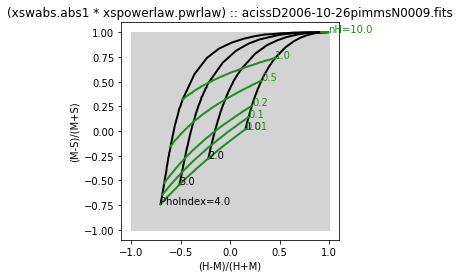

In [10]:
#
# Plot it
#
matrix_09.plot()

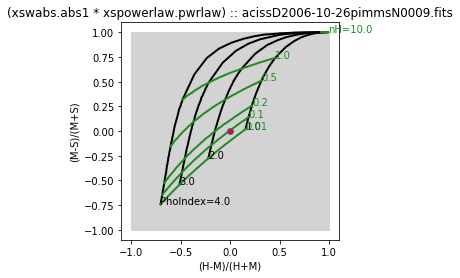

In [11]:
#
# Add extra stuff to plot
#
matrix_09.plot()

plt.plot([0],[0],marker="o",mfc="red")
plt.show()